<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-A01793006/blob/main/Curso02_Modulo04_A01793006.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DATOS GENERALES**

Alumna: Diana Valeria Garcia Briones

Matricula: A01793006

Modulo 04 - IBM



---




**Resultados de Progreso y Resultado de Examen**

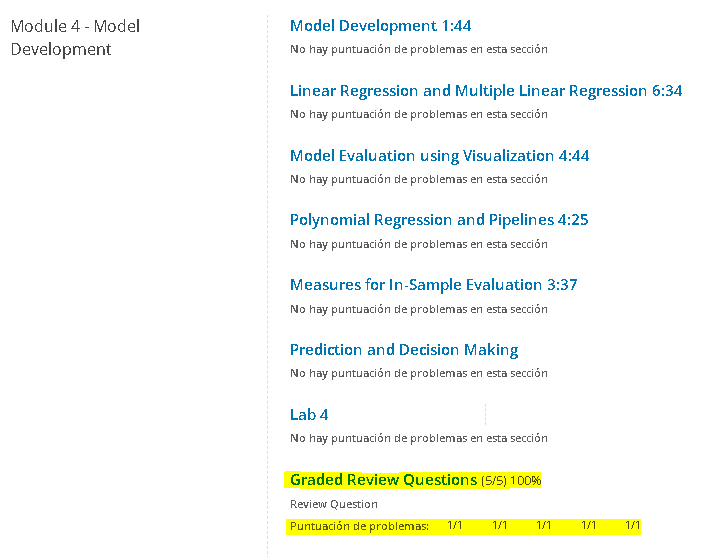![image.png](
  
)

#Modelos Predictivos

En el análisis de datos, a menudo usamos el desarrollo de modelos para ayudarnos a predecir futuras observaciones a partir de los datos que tenemos.

Un modelo nos ayudará a comprender la relación exacta entre diferentes variables y cómo se utilizan estas variables para predecir el resultado.

In [3]:
#Importanción de Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

In [7]:
#Almacenar archivo de forma local

filename=("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv")

def download(url, filename):
    response = requests.get(url)
    if response.status_code == 200:
        print(response.content)
        with open(filename, "wb") as f:
            f.write(response.content)

Downloads = download(filename, "auto.csv") 

b'symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas\n3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.8111484863046613,0.8902777777777777,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476190476188,Medium,0,1\n3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.8111484863046613,0.8902777777777777,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476190476188,Medium,0,1\n1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.8226814031715521,0.9097222222222222,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.36842105263158,Medium,0,1\n2,164,audi,std,four,sedan,fwd,front,99.8,0.8486304661220567,0.9194444444444444,54.3,2337,ohc,four,109,mpfi,3.19,3

In [8]:
#Asignación de Encabezados

headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [11]:
df = pd.read_csv(filename)
df.head() #Impresion de datos

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


#Regresion Linear y Regresion Linear Multiple

El resultado de la regresión lineal es una función lineal que predice la variable de respuesta (dependiente) en función de la variable predictora (independiente).

In [12]:
#Carga de modulos 
from sklearn.linear_model import LinearRegression

In [14]:
#Creacion del Objeto de Regresion Linear
lm = LinearRegression()
lm

#Asignacion de Variables
X = df[['highway-mpg']]
Y = df['price']

*En scikit-learn, un FIT es un objeto que se ajusta a un modelo basado en los datos de entrada*

In [15]:
lm.fit(X,Y) #Ajuste el modelo lineal usando Highway-mpg:

LinearRegression()

In [16]:
#Resultado de la Prediccion
Yhat=lm.predict(X)
Yhat[0:5]  

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [18]:
print(lm.intercept_)  #Define el valor de a
print(lm.coef_) #Define el valor de b

38423.3058581574
[-821.73337832]


*Sustituyendo estos valores en la formula de y=a+bx obtenemos la estiacion del Precio = 38423.31 - 821.73 x mpg.*

In [ ]:
#Promedio general
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
print("Promedio de Normalización de Perdidas:", avg_norm_loss)

Promedio de Normalización de Perdidas: 122.0


#Regresion Linear Multiple

Sirve para predecir mas variables que el modelo linear simmple. Este método se usa para explicar la relación entre una variable de respuesta continua (dependiente) y dos o más variables predictoras (independientes).

In [19]:
#Definicion de variables para predecir
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [20]:
#Ajuste del modelo linear con las variables definidas en Z para predecir el precio
lm.fit(Z, df['price'])

LinearRegression()

In [21]:
print(lm.intercept_)  #Define el valor de a
print(lm.coef_) #Define el valor de b

-15806.62462632922
[53.49574423  4.70770099 81.53026382 36.05748882]


#Evaluacion de los Modelos usando Visualizaciones



In [22]:
#Importacion de Librerias
import seaborn as sns
%matplotlib inline 

**Grafico de Regresion**

Es utilizado comunmente para visualizar modelos de regresion. Muestra combinación de puntos de datos dispersos (un gráfico de dispersión), así como la línea de regresión lineal ajustada que pasa por los datos. 

Esto nos permite una estimacion razonable de la relacion entre las dos variables, la fuerza de la correlacion, así como la dirección (correlación positiva o negativa).

(0.0, 48176.32495573383)

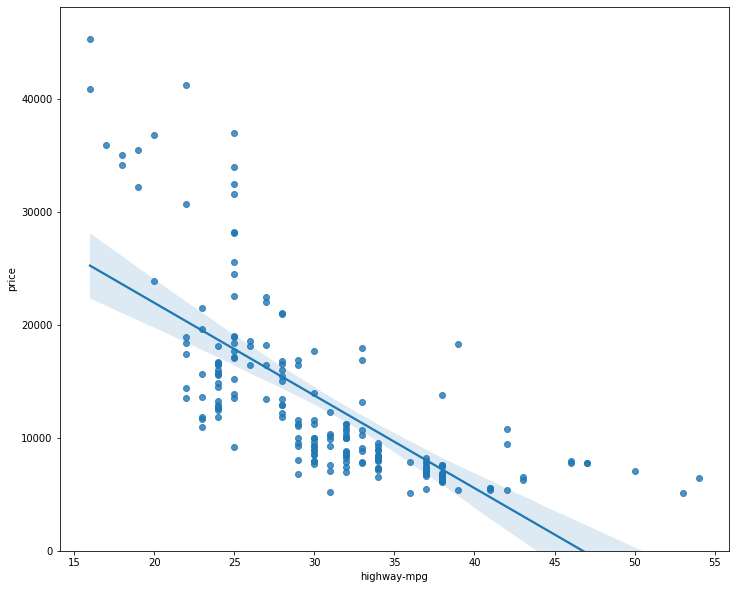

In [24]:
#Creacion del Grafico para highway-gp
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0.0, 47414.1)

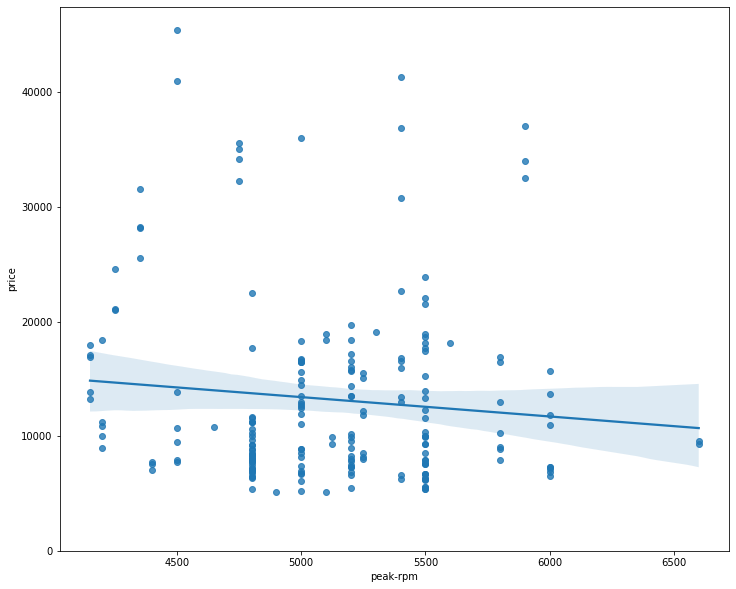

In [25]:
#Creacion del Grafico para peak-rpm
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

Comparando los graficos de "rpm" vs "mpg", vemos que los puntos para "mpg" estan mucho mas cerca de la linea.

Los puntos de "rpm" estan mas dispersos alrededor de la linea predicha y es mucho mas dificil determinar si los puntos disminuyen o aumentan.

**Grafico de Residuos**

Residuo: La diferencia entre el valor observado (y) y el valor predicho.

Una gráfica de residuos es un gráfico que muestra los residuos en el eje y vertical y la variable independiente en el eje x horizontal.

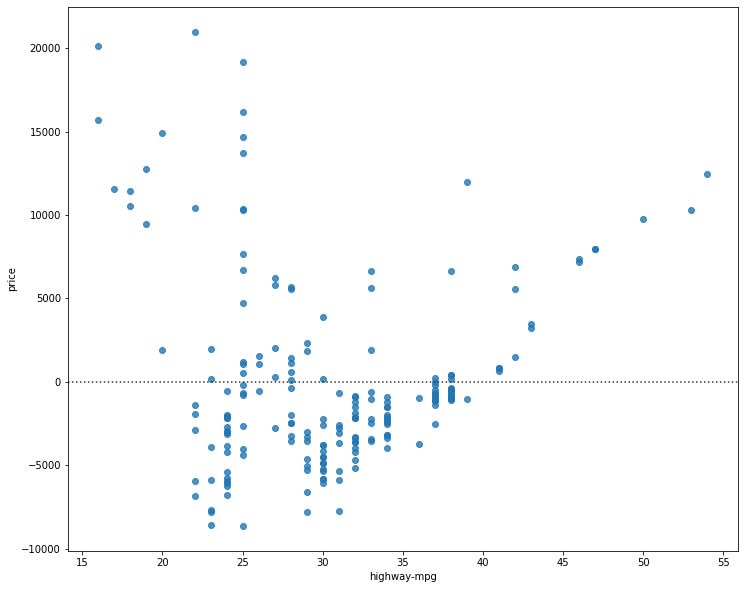

In [26]:
#Grafico de Residuos
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'],y=df['price'])
plt.show()

En la grafica los residuos no se distribuyen aleatoriamente alrededor del eje x, lo que nos lleva a creer que tal vez un modelo no lineal sea más apropiado para estos datos.

**Visualizaciones para Regresion lineal multiple**

Una forma de ver el ajuste del modelo es mirar el gráfico de distribución. Podemos observar la distribución de los valores ajustados que resultan del modelo y compararla con la distribución de los valores reales.

In [28]:
Y_hat = lm.predict(Z) #Prediccion de datos

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


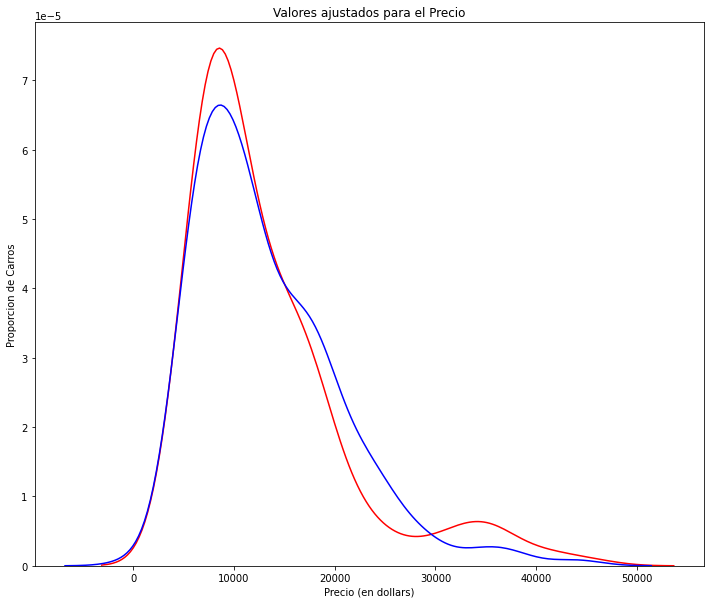

In [30]:
#Creacion de la Visualizacion
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Valores ajustados para el Precio')
plt.xlabel('Precio (en dollars)')
plt.ylabel('Proporcion de Carros')

plt.show()
plt.close()


Llos valores ajustados estan razonablemente cerca de los valores reales ya que las dos distribuciones se superponen un poco. Sin embargo, definitivamente hay algo de espacio para mejorar.

#Regresion Polinomial

Obtenemos relaciones no lineales elevando al cuadrado o estableciendo términos de orden superior de las variables predictoras.

Hay diferentes órdenes de regresión polinomial:

In [35]:
#Ejercico de Modelo Polinomial

def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Ajuste polinomial con Matplotlib para Precio ~ Longitud')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Precio de los coches')

    plt.show()
    plt.close()

In [38]:
#Definicion de Variables 
x = df['highway-mpg']
y = df['price']

In [39]:
#Definimos el Polinomio
f = np.polyfit(x, y, 3) #Le asginamos un grado 3
p = np.poly1d(f)
print(p)


        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


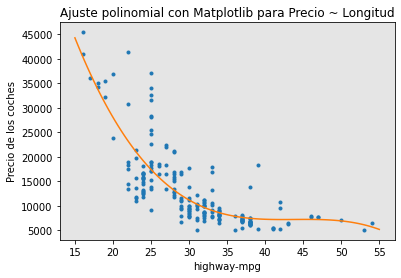

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

In [40]:
#Uso de la funcion polinomial
PlotPolly(p, x, y, 'highway-mpg')
np.polyfit(x, y, 3)

#Medidas para la evaluación dentro de la muestra

Se utiliza R^2 para evaluar el modelo 

In [48]:
lm.fit(X, Y)
# Find the R^2
print('El valor de R es: ', lm.score(X, Y))

El valor de R es:  0.4965911884339176


In [49]:
Yhat=lm.predict(X)
print('La salida de los primeros cuatro valores predichos es:: ', Yhat[0:4])

La salida de los primeros cuatro valores predichos es::  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


**Funcion de cuadrado medio del error**

In [50]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(df['price'], Yhat)
print('El error cuadrático medio del precio y el valor predicho es: ', mse)

El error cuadrático medio del precio y el valor predicho es:  31635042.944639888


**Pruebas para Modelos de Regresion Linear Multiple**

Se utilizan las mismas funciones.

In [52]:
#Ajuste del mmodelol
lm.fit(Z, df['price'])
# Find the R^2
print('EL valor de R es: ', lm.score(Z, df['price']))

#Prediccion
Y_predict_multifit = lm.predict(Z)

EL valor de R es:  0.8093562806577457


**Pruebas para Polinomios**

In [53]:
from sklearn.metrics import r2_score
r_squared = r2_score(y, p(x))
print('El valor de R es:', r_squared)

El valor de R es: 0.674194666390652
